# Titantic Survival Prediction
The goal of this dataset is predict wheather someone will survive the crash of Titanic

<a href="https://www.kaggle.com/c/titanic">Kaggle Dataset</a>

1. Data Set Info
2. Loading Data
3. Cleaning up Data
4. Building Prediction Model
5. Pipeline

## Load Dependencies

In [1]:
import os
import numpy
import pandas
import platform
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
import sklearn
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import ensemble

%matplotlib inline

In [2]:
print("Python Version: {}".format(platform.python_version()))
print("Seaborn Version: {0}".format(sns.__version__))
print("Matplotlib Version: {0}".format(matplotlib.__version__))
print("Numpy Version: {0}".format(numpy.__version__))
print("Sklearn Version: {0}".format(sklearn.__version__))
print("Pandas Version: {0}".format(pandas.__version__))

Python Version: 3.6.6
Seaborn Version: 0.9.0
Matplotlib Version: 3.0.2
Numpy Version: 1.13.3
Sklearn Version: 0.19.1
Pandas Version: 0.23.0


# Data Set Info

|Variable|Definition|Key|
|--------|----------|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||	
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes
<b>pclass:</b> A proxy for socio-economic status (SES)
<br>
1st = Upper
<br>
2nd = Middle
<br>
3rd = Lower
<br>

<b>age:</b> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
<br>

<b>sibsp:</b> The dataset defines family relations in this way...
<br>
Sibling = brother, sister, stepbrother, stepsister
<br>
Spouse = husband, wife (mistresses and fiancés were ignored)

<b>parch:</b> The dataset defines family relations in this way...
<br>
Parent = mother, father
<br>
Child = daughter, son, stepdaughter, stepson
<br>
Some children travelled only with a nanny, therefore parch=0 for them.



# Load Training and Testing Data

In [3]:
dataDirectory = "Data"

#Create File Path to Training and Testing Directores
trainDirectory = os.path.join(dataDirectory, "Train")
testDirectory = os.path.join(dataDirectory, "Test")

#Create File Paths for Training and Testing Data
trainFilePath = os.path.join(trainDirectory, "train.csv")
testFilePath = os.path.join(testDirectory, "test.csv")

#Load training and testing data into Data Frames
trainDF = pandas.read_csv(trainFilePath)
testDF = pandas.read_csv(testFilePath)

In [4]:
trainDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Get Columns and their data types
trainDF.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
testDF.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Percentage of Survives by Gender

<Figure size 432x288 with 0 Axes>

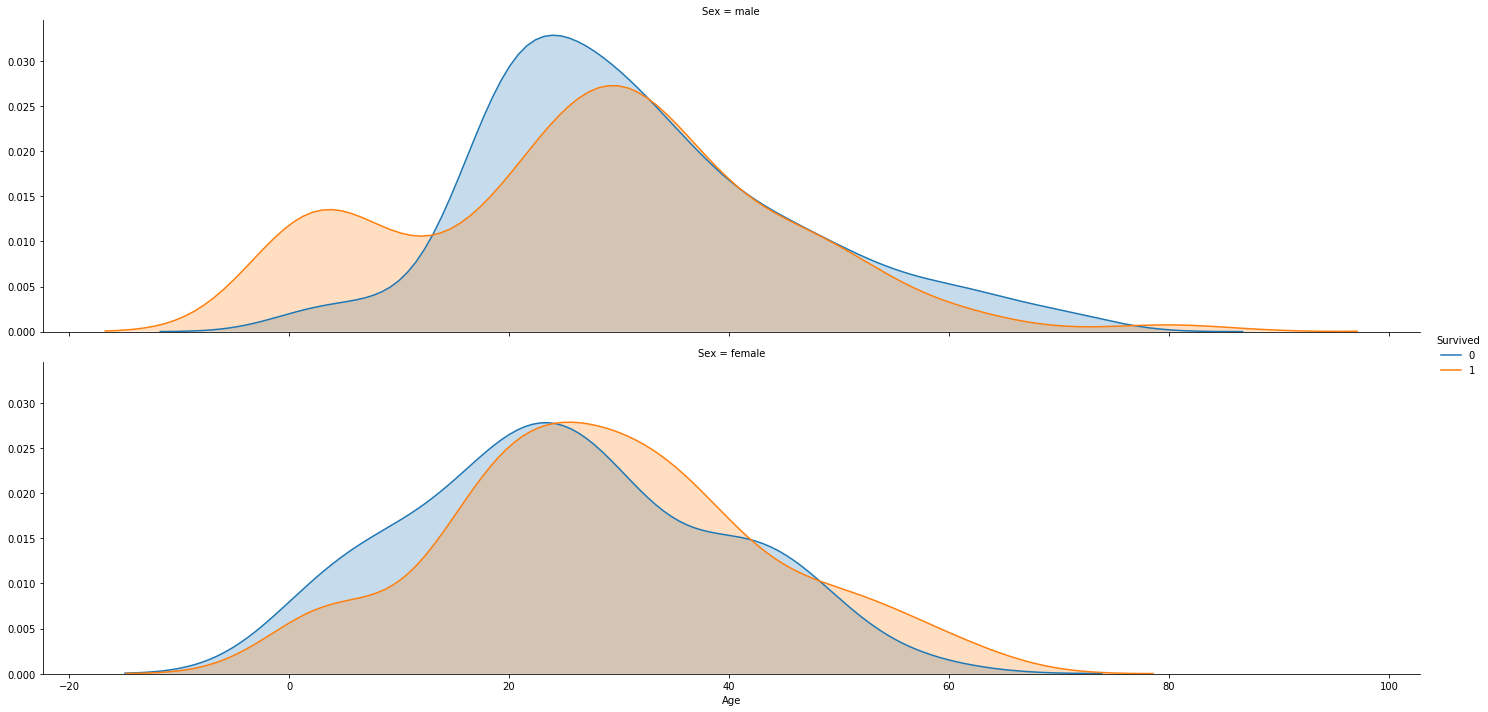

In [7]:
plt.clf()

facet = sns.FacetGrid(trainDF, hue='Survived', aspect=4, row='Sex', height=5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()

plt.show()

In [8]:
#Group by Survived
survivedDF = trainDF.groupby(["Survived"])
survivedBySexDF = survivedDF["Sex"].value_counts()

#Total Number of People by Survival
survivedCountsDF = trainDF.groupby(["Survived"]).count()["Sex"]
survivedCountsDF

#Get Percentages of Gender by Survival
percentageSurvivedDF = (survivedBySexDF/survivedCountsDF)*100
percentageSurvivedDF.sort_index(inplace=True)
percentageSurvivedDF.head()

Survived  Sex   
0         female    14.754098
          male      85.245902
1         female    68.128655
          male      31.871345
Name: Sex, dtype: float64

In [9]:
#Pie Chart Color
colors = ["lightcoral", "Deepskyblue"]

Text(0, 0.5, 'Percentage Died')

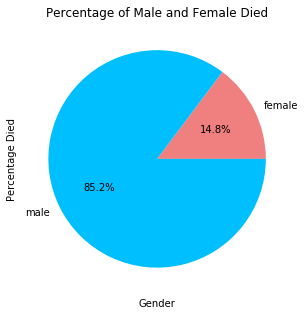

In [10]:
#Pie Chart for Percentage of Gender Died
diedPlot = percentageSurvivedDF.loc[0].plot.pie(figsize=(5,5), autopct="%1.1f%%", colors=colors)
diedPlot.set_title("Percentage of Male and Female Died")
diedPlot.set_xlabel("Gender")
diedPlot.set_ylabel("Percentage Died")

Text(0, 0.5, 'Percentage Survived')

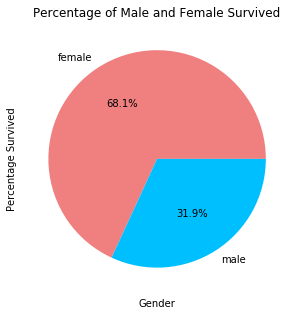

In [11]:
#Pie Chart for Percentage of Gender Survived
survivedPlot = percentageSurvivedDF.loc[1].plot.pie(figsize=(5,5), autopct="%1.1f%%", colors=colors)
survivedPlot.set_title("Percentage of Male and Female Survived")
survivedPlot.set_xlabel("Gender")
survivedPlot.set_ylabel("Percentage Survived")

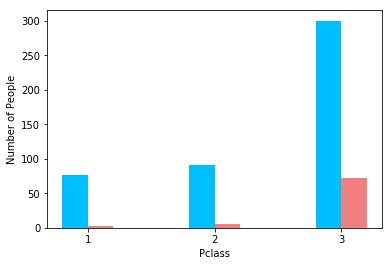

In [12]:
width = 0.20# the width of the bars
ind = numpy.arange(3)

survivedDF = trainDF[trainDF["Survived"] == 0]
survivedMaleDF = survivedDF[survivedDF["Sex"] == "male"]
survivedFemaleDF = survivedDF[survivedDF["Sex"] == "female"]

fig, ax = plt.subplots()
malePclassDF = survivedMaleDF.groupby(["Pclass"])["Name"].count()
femalePclassDF = survivedFemaleDF.groupby(["Pclass"])["Name"].count()
ax.bar(ind - width/2, malePclassDF, width, color="Deepskyblue")
ax.bar(ind + width/2, femalePclassDF, width, color="lightcoral")
ax.set_xticks(ind)
ax.set_xticklabels(('1', '2', "3"))
ax.set_xlabel("Pclass")
ax.set_ylabel("Number of People")
plt.show()

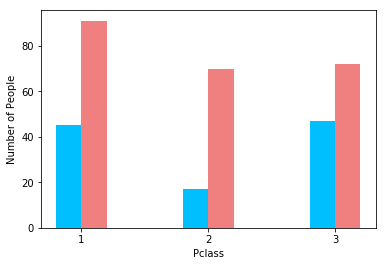

In [13]:
survivedDF = trainDF[trainDF["Survived"] == 1]
survivedMaleDF = survivedDF[survivedDF["Sex"] == "male"]
survivedFemaleDF = survivedDF[survivedDF["Sex"] == "female"]

fig, ax = plt.subplots()
malePclassDF = survivedMaleDF.groupby(["Pclass"])["Name"].count()
femalePclassDF = survivedFemaleDF.groupby(["Pclass"])["Name"].count()
ax.bar(ind - width/2, malePclassDF, width, color="Deepskyblue")
ax.bar(ind + width/2, femalePclassDF, width, color="lightcoral")
ax.set_xticks(ind)
ax.set_xticklabels(('1', '2', "3"))
ax.set_xlabel("Pclass")
ax.set_ylabel("Number of People")
plt.show()

# Merge Training and Testing Data

In [14]:
#Drop Survived Column
#cleanTrainDF = cleanTrainDF.drop(columns=["Survived"])
cleanTrainDF = trainDF.copy()

#Copy Testing Dataset
cleanTestDF = testDF.copy()

#Add Dataset label
cleanTrainDF["Dataset"] = "Train"
cleanTestDF["Dataset"] = "Test"

#Combine Training and Testing Dataset
combinedDF = pandas.concat([cleanTrainDF, cleanTestDF], sort=False)
combinedDF.reset_index(inplace=True)
combinedDF.drop(columns=["index"], inplace=True)
combinedDF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


# 3. Cleaning up Data

In [15]:
combinedDF.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Dataset           0
dtype: int64

If the age does not exists for passenger replace it with that gender's mean age

## 3.2 Age

In [16]:
#Get Mean Age for male and fmeale
meanAge = combinedDF.groupby(["Sex"]).mean()["Age"]
meanFemaleAge = meanAge["female"]
meanMaleAge = meanAge["male"]

def MeanAge(row):
    """
    If age is not a number, replace with that passenger's gender's median age
    """
    if(pandas.isna(row["Age"])):
        if(row["Sex"] == "female"):
            return meanFemaleAge
        else:
            return meanMaleAge
    else:
        return row["Age"]
    
combinedDF["Age"] = combinedDF.apply(MeanAge, axis=1)    

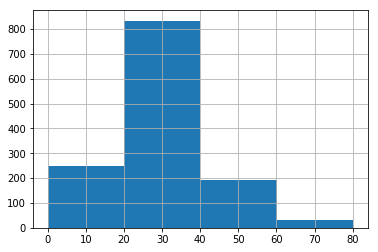

In [17]:
bins = 4
combinedDF["Age"].hist(bins=bins)

<Figure size 432x288 with 0 Axes>

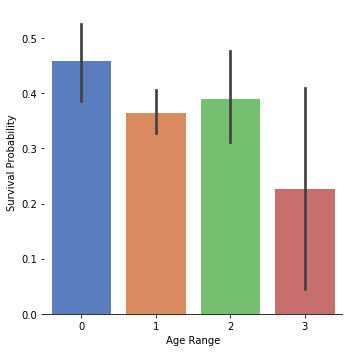

In [18]:
combinedDF["Age Range"] = pandas.cut(combinedDF["Age"], bins=bins, labels=range(bins))
plt.clf()
embarkedDF = combinedDF[combinedDF["Dataset"] == "Train"][["Age Range", "Survived"]]
g = sns.catplot(x="Age Range", y="Survived", data=embarkedDF.sort_values(by="Age Range"), kind="bar", height = 5, palette = "muted")
g = g.set_ylabels("Survival Probability")
g.despine(left=True)
plt.show()

In [19]:
print(str(combinedDF['Embarked'].value_counts()) + "\n")
print(str(combinedDF['Embarked'].describe()) + "\n")
print(combinedDF['Embarked'].isnull().sum())

S    914
C    270
Q    123
Name: Embarked, dtype: int64

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

2


## 3.3 Embarked

In [20]:
trainDF["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
combinedDF["Embarked"] = combinedDF["Embarked"].fillna("X")
embarkedMap = {"S": 0, "C": 1, "Q":2, "X":3}
combinedDF["Embarked Map"] = combinedDF["Embarked"].map(embarkedMap)

<Figure size 432x288 with 0 Axes>

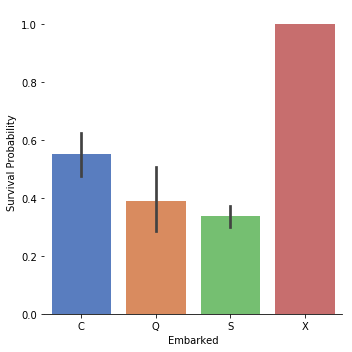

In [22]:
plt.clf()
embarkedDF = combinedDF[combinedDF["Dataset"] == "Train"][["Embarked", "Survived"]]
g = sns.catplot(x="Embarked", y="Survived", data=embarkedDF.sort_values(by="Embarked"), kind="bar", height = 5, palette = "muted")
g = g.set_ylabels("Survival Probability")
g.despine(left=True)
plt.show()

In [23]:
combinedDF[combinedDF["Dataset"] == "Train"].groupby(["Embarked", "Survived"])["Sex"].count()

Embarked  Survived
C         0.0          75
          1.0          93
Q         0.0          47
          1.0          30
S         0.0         427
          1.0         217
X         1.0           2
Name: Sex, dtype: int64

In [24]:
combinedDF["Cabin"] = combinedDF["Cabin"].fillna("X")
combinedDF["Cabin Letter"] = combinedDF[combinedDF["Cabin"].notnull()]["Cabin"].astype(str).str[0]

In [25]:
combinedDF["Cabin Letter"].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin Letter, dtype: int64

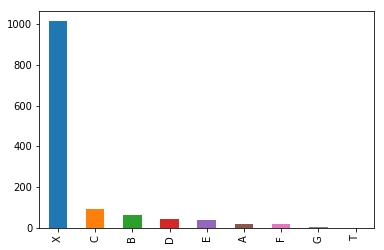

In [26]:
combinedDF["Cabin Letter"].value_counts().plot(kind="bar")

<Figure size 432x288 with 0 Axes>

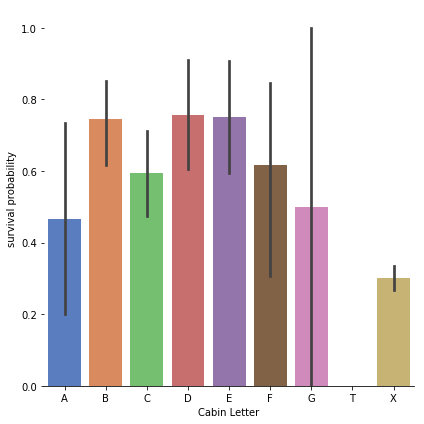

In [27]:
plt.clf()
cabinDF = combinedDF[combinedDF["Dataset"] == "Train"][["Cabin","Cabin Letter", "Survived"]]
g = sns.catplot(x="Cabin Letter", y="Survived", data=cabinDF.sort_values(by="Cabin Letter"), kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability")
g.despine(left=True)
plt.show()

## 3.3 Sex

In [28]:
combinedDF["Gender"] = combinedDF.apply(lambda x: 0 if(x["Sex"] == "male") else 1, axis=1)

## 3.5 Family Size

In [29]:
print(str(combinedDF['Parch'].value_counts()) + "\n")
print(str(combinedDF['Parch'].describe()) + "\n")
print(combinedDF['Parch'].isnull().sum())

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

0


<Figure size 432x288 with 0 Axes>

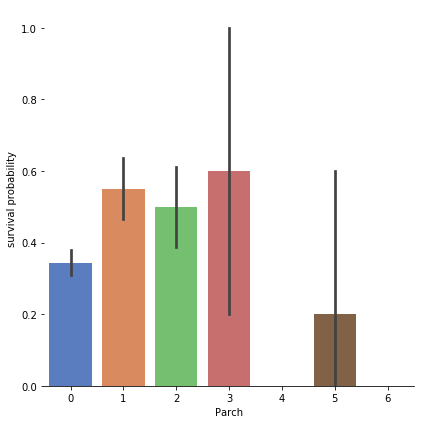

In [30]:
plt.clf()
parchDF = combinedDF[combinedDF["Dataset"] == "Train"][["Parch","Cabin Letter", "Survived"]]
g = sns.catplot(x="Parch", y="Survived", data=parchDF.sort_values(by="Parch"), kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability")
g.despine(left=True)
plt.show()

In [31]:
print(str(combinedDF['SibSp'].value_counts()) + "\n")
print(str(combinedDF['SibSp'].describe()) + "\n")
print(combinedDF['SibSp'].isnull().sum())

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

0


<Figure size 432x288 with 0 Axes>

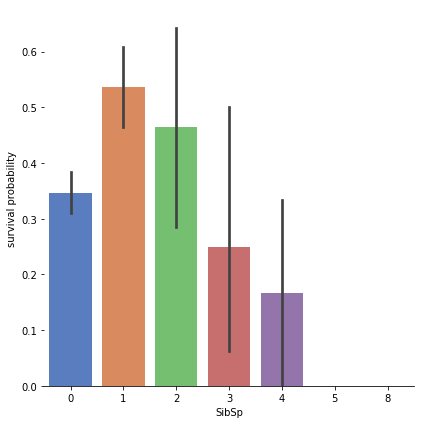

In [32]:
plt.clf()
parchDF = combinedDF[combinedDF["Dataset"] == "Train"][["SibSp","Cabin Letter", "Survived"]]
g = sns.catplot(x="SibSp", y="Survived", data=parchDF.sort_values(by="SibSp"), kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability")
g.despine(left=True)
plt.show()

<Figure size 432x288 with 0 Axes>

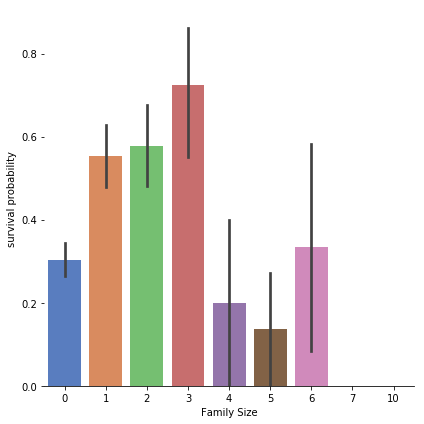

In [33]:
combinedDF["Family Size"] = combinedDF["Parch"] + combinedDF["SibSp"]

plt.clf()
parchDF = combinedDF[combinedDF["Dataset"] == "Train"][["Family Size","Cabin Letter", "Survived"]]
g = sns.catplot(x="Family Size", y="Survived", data=parchDF.sort_values(by="Family Size"), kind="bar", height = 6, palette = "muted")
g = g.set_ylabels("survival probability")
g.despine(left=True)
plt.show()

In [34]:
combinedDF["Age Range"] = combinedDF["Age Range"].astype("int64")
combinedDF["Fare"] = combinedDF["Fare"].fillna(-1)

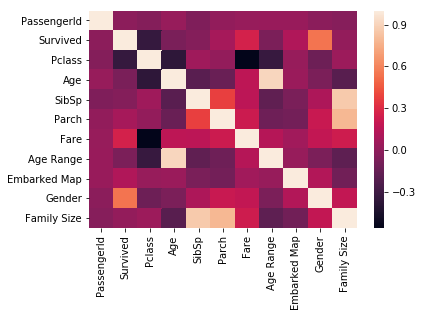

In [35]:
plt.clf()
corr = combinedDF.corr()
sns.heatmap(corr)
plt.show()

In [36]:
combinedDF.dtypes

PassengerId       int64
Survived        float64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Dataset          object
Age Range         int64
Embarked Map      int64
Cabin Letter     object
Gender            int64
Family Size       int64
dtype: object

In [37]:
combinedDF.select_dtypes(include=["float64", "int64"]).isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
Age Range         0
Embarked Map      0
Gender            0
Family Size       0
dtype: int64

In [38]:
combinedDF.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age Range,Embarked Map,Gender,Family Size
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.909496,0.498854,0.385027,33.269280,1.009167,0.398778,0.355997,0.883881
std,378.020061,0.486592,0.837836,12.889182,1.041658,0.865560,51.747562,0.662385,0.661200,0.478997,1.583639
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000,1.000000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,3.000000,3.000000,1.000000,10.000000


In [39]:
trainDF = combinedDF[combinedDF["Dataset"] == "Train"]
testDF = combinedDF[combinedDF["Dataset"] == "Test"]

# Building the Model

## Linear Regression

In [40]:
trainDF = combinedDF[combinedDF["Dataset"] == "Train"]
trainDF.select_dtypes(include=["float64", "int64"]).isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Age Range       0
Embarked Map    0
Gender          0
Family Size     0
dtype: int64

In [41]:
X = trainDF[["Gender", "Age Range", "Pclass", "Fare", "Family Size", "Embarked Map"]]
y = trainDF["Survived"]
reg = LinearRegression().fit(X, y)

In [42]:
reg.score(X, y)

0.39175203928974378

In [43]:
reg.coef_

array([  5.09635871e-01,  -9.70385485e-02,  -1.67171024e-01,
         3.41879307e-04,  -2.90361633e-02,   3.97051304e-02])

In [44]:
reg.intercept_ 

0.68709001928175351

## Princple Component Analysis Decomposition

In [45]:
pca = PCA(n_components=2)
pca.fit(X)


print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  


[ 0.9983637   0.00103264]
[ 1482.60132679    47.68196811]


In [46]:
pcaDF = pandas.DataFrame(data=pca.transform(X))
pcaDF["Survived"] = trainDF["Survived"]
pcaDF.head()

,0,1,Survived
0,-24.959130,0.320074,0.0
1,39.090854,-0.289310,1.0
2,-24.289478,-0.613095,1.0
3,20.907903,-0.140594,1.0
4,-24.166241,-0.666403,0.0


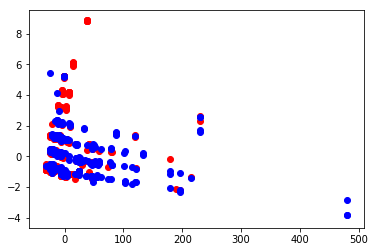

In [47]:
plt.clf()
pcaDFDied = pcaDF[pcaDF["Survived"] == 0]
pcaDFSurvived = pcaDF[pcaDF["Survived"] == 1]
plt.scatter(pcaDFDied.iloc[:,0], pcaDFDied.iloc[:,1], color="r")
plt.scatter(pcaDFSurvived.iloc[:,0], pcaDFSurvived.iloc[:,1], color="b")
plt.show()

In [48]:
reg = LinearRegression().fit(pcaDF.iloc[:,0:2], y)
reg.score(pcaDF.iloc[:,0:2], y)

0.067950536391367833

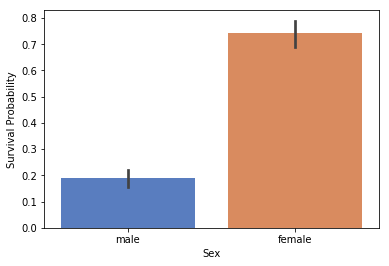

In [49]:
plt.clf()
g = sns.barplot(x="Sex",y="Survived",data=trainDF, palette = 'muted')
g = g.set_ylabel("Survival Probability")
plt.show()

In [50]:
trainDF["Pclass"].unique()

array([3, 1, 2])

In [51]:
#Generates training and testing accuracy data for different feature numbers, while also fitting the GridSearchCV model
def n_feat_opt(estimator, title, X, y):
    train_acc = []
    test_acc = []
    param_lst = []
    comp_lst = []
    for i in range(1,4):
        pca = PCA(n_components = i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        
        X_train_trans = pca.fit_transform(X_train)
        X_test_trans = pca.transform(X_test)
        
        estimator.fit(X_train_trans, y_train)
        
        train_score = estimator.score(X_train_trans, y_train)
        test_score = cross_val_score(estimator.best_estimator_, X_test_trans, y_test, cv=6, n_jobs=-1)
        test_score = sum(test_score)/len(test_score)
        train_acc.append(train_score)
        test_acc.append(test_score)
        param_lst.append(estimator.best_params_)
        comp_lst.append(i)
    
    return train_acc, test_acc, param_lst, comp_lst


In [52]:

#Prints plot of training and testing accuracy with respect to feature number
def feat_print(train_acc, test_acc, comp_lst, title):
    plt.clf()
    plt.figure()
    plt.title(title)
    plt.xlabel("Features")
    plt.ylabel("Score")
    plt.plot(comp_lst, train_acc, 'o-', color='r', label='Training Score')
    plt.plot(comp_lst, test_acc, 'o-', color='g', label='Testing Score')
    plt.legend()
    return plt

In [53]:
#Generates model learning curves for a given feature number
def curve(estimator, title, X, y, n):
    pca = PCA(n_components=n)
    X_trans = pca.fit_transform(X)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_trans, y, cv=6, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<Figure size 432x288 with 0 Axes>

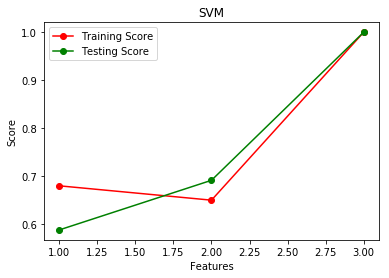

In [54]:
model_svm = svm.SVC(probability=True)
C_OPTIONS = [ 800, 900, 1000, 1100, 1200, 15000]
G_OPTIONS = [0.005,0.003, 0.001, 0.0008, .01]
param_grid = [
    {
        'C': C_OPTIONS,
        'gamma': G_OPTIONS
    }]
grid_svm = GridSearchCV(model_svm, cv=6, n_jobs=-1, param_grid=param_grid, scoring='accuracy')
train_acc, test_acc, param_lst, comp_lst = n_feat_opt(grid_svm, 'SVM', combinedDF[combinedDF["Dataset"] == "Train"][["Family Size","Age Range", "Survived"]], trainDF["Survived"])

feat_print(train_acc, test_acc, comp_lst, 'SVM')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(trainDF[["Age Range", "Gender","Fare"]])

In [56]:
resultsDF = (kmeans.predict(trainDF[["Age Range", "Gender", "Fare"]]) == trainDF["Survived"])
print("Number of Correct Predictions: {}".format(resultsDF.sum()))
print("Number of Predictions: {}".format(resultsDF.count()))

Number of Correct Predictions: 574
Number of Predictions: 891


In [57]:
#(kmeans.predict(trainDF[["Age Range", "Gender", "Fare"]]) == trainDF["Survived"])

In [58]:
clf = ensemble.GradientBoostingClassifier()
clf.fit(trainDF[["Age Range", "Gender","Fare"]], combinedDF[combinedDF["Dataset"] == "Train"]["Survived"])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [59]:
(clf.predict(trainDF[["Age Range", "Gender","Fare"]]) == trainDF["Survived"]).sum()

760

In [60]:
results = clf.predict(testDF[["Age Range", "Gender","Fare"]]).astype(int)
results

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [61]:
results = pandas.DataFrame({"PassengerId": testDF["PassengerId"], "Survived": results})
results["PassengerId"] = testDF["PassengerId"]

In [62]:
results.to_csv("output.txt",index=False )

In [63]:
results.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [64]:
testDF["PassengerId"].head()

891    892
892    893
893    894
894    895
895    896
Name: PassengerId, dtype: int64

In [65]:
results["PassengerId"].head()

891    892
892    893
893    894
894    895
895    896
Name: PassengerId, dtype: int64

In [66]:
results["PassengerId"] = testDF["PassengerId"]
results["PassengerId"].head()

891    892
892    893
893    894
894    895
895    896
Name: PassengerId, dtype: int64